In [4]:
# Perceptron
import numpy as np
import pandas as pd

class Perceptron:
    def __init__(self, learning_rate=0.1, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step
        self.weights = None
        self.bias = None

    def _unit_step(self, x):
        return np.where(x >= 0, 1, -1)
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # Update only if there is an error
                if y[idx] * y_predicted <= 0:
                    self.weights += self.lr * y[idx] * x_i
                    self.bias += self.lr * y[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_func(linear_output)


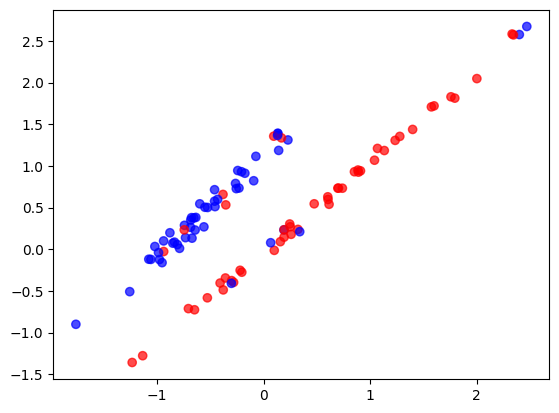

In [10]:
# Generated data

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_redundant=0,
                           flip_y=0.1, class_sep=0.5,
                           n_informative=2, n_clusters_per_class=1, random_state=42)

y = np.where(y==0, -1, 1)

df = pd.DataFrame(X, columns=["x1", "x2"])
plt.scatter(df["x1"], df["x2"], c=y, cmap="bwr", alpha=0.7)

In [35]:
# Training and testing perceptron
pctron = Perceptron(learning_rate=0.01, n_iters=1000)

pctron.fit(X, y)

y_pred_our = pctron.predict(X)

accuracy = np.mean(y_pred_our == y)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 77.00%


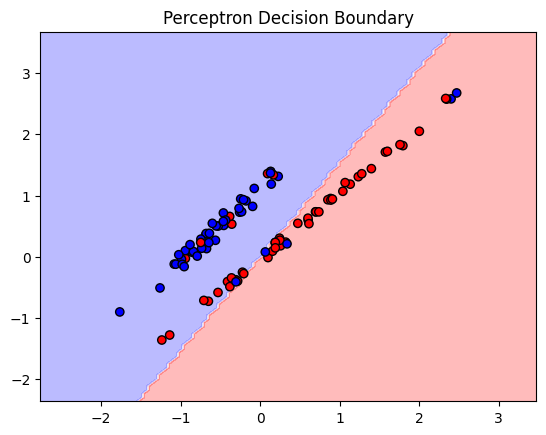

In [26]:
# Visualization
def plot_decision_boundary(X, y, model):
    x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx0, xx1 = np.meshgrid(np.linspace(x0_min, x0_max, 100),
                           np.linspace(x1_min, x1_max, 100))
    grid = np.c_[xx0.ravel(), xx1.ravel()]
    preds = model.predict(grid).reshape(xx0.shape)

    plt.contourf(xx0, xx1, preds, alpha=0.3, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
    plt.title("Perceptron Decision Boundary")
    plt.show()

plot_decision_boundary(X, y, pctron)


In [24]:
# Comparison with sklearn's perceptron
import sklearn.linear_model

sklearn_pctron = sklearn.linear_model.Perceptron(max_iter=1000, eta0=0.01)

sklearn_pctron.fit(X, y)

y_pred_sklearn = sklearn_pctron.predict(X)


In [30]:
# Evaluation and Comparision
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
print("Our perceptron: ", accuracy_score(y, y_pred_our))
print("Sklean's perceptron: ", accuracy_score(y, y_pred_sklearn))

# Confusion Matrix
print("\n Our Perceptron:")
print(confusion_matrix(y, y_pred_our))

#print("Sklean's Perceptron:")
#print(confusion_matrix(y, y_pred_sklearn))

# Classification Report
print("\nCustom Perceptron Report:")
print(classification_report(y, y_pred_our))

print("\nSklearn Perceptron Report:")
print(classification_report(y, y_pred_sklearn))


Our perceptron:  0.77
Sklean's perceptron:  0.78

 Our Perceptron:
[[45  5]
 [18 32]]

Custom Perceptron Report:
              precision    recall  f1-score   support

          -1       0.71      0.90      0.80        50
           1       0.86      0.64      0.74        50

    accuracy                           0.77       100
   macro avg       0.79      0.77      0.77       100
weighted avg       0.79      0.77      0.77       100


Sklearn Perceptron Report:
              precision    recall  f1-score   support

          -1       0.91      0.62      0.74        50
           1       0.71      0.94      0.81        50

    accuracy                           0.78       100
   macro avg       0.81      0.78      0.77       100
weighted avg       0.81      0.78      0.77       100



Our decision boundary


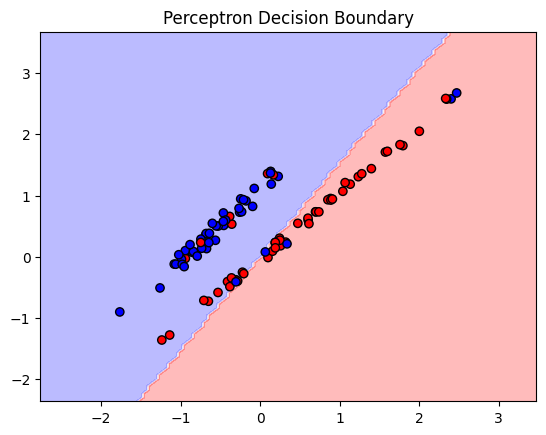

Sklearn;s decision boundary


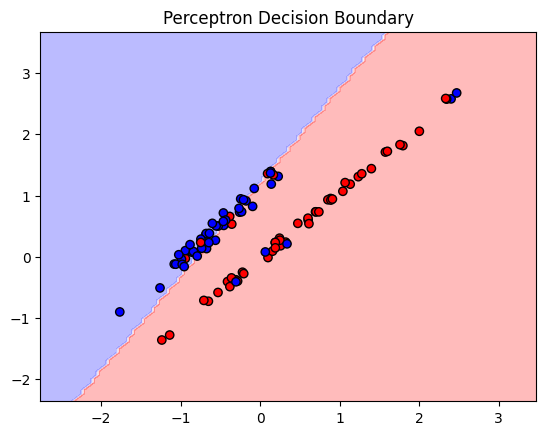

In [34]:
# Conclusin: Our perceptron predicted y=-1 with good accuracy but not y=1

# Lets see where is this differnce coming from.
print("Our decision boundary")
plot_decision_boundary(X, y, pctron)

print("Sklearn;s decision boundary")
plot_decision_boundary(X, y, sklearn_pctron)
